In [47]:
from fp2graph import *
from shapely import Polygon
import skimage.measure as meas
from sklearn.cluster import KMeans
import plotly.express as px
import re

In [3]:
PATH = 'plans/fp_ostwald11_f3_2.png'
f = FloorPlan2Graph(PATH)

<module 'matplotlib.pyplot' from '/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/gqenv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

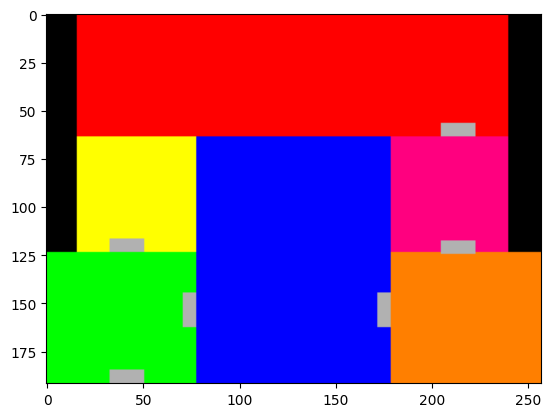

In [4]:
f.image2tensor()
f.view_plan_image()

<module 'matplotlib.pyplot' from '/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/gqenv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

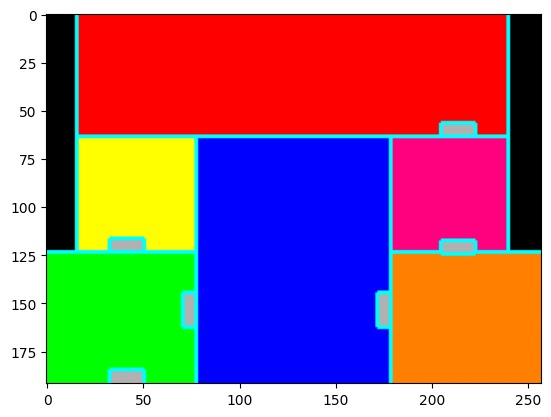

In [5]:
f.segment_tensor()
f.view_plan_segments()

In [6]:
f.tensor_labels

array([[8, 8, 8, ..., 8, 8, 8],
       [8, 8, 8, ..., 8, 8, 8],
       [8, 8, 8, ..., 8, 8, 8],
       ...,
       [6, 6, 6, ..., 5, 5, 5],
       [6, 6, 6, ..., 5, 5, 5],
       [6, 6, 6, ..., 5, 5, 5]], dtype=int8)

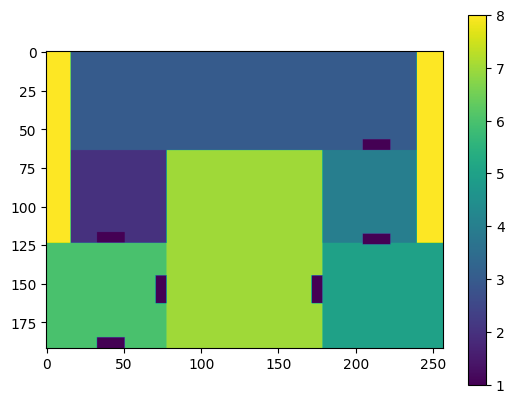

In [7]:
fig, ax = plt.subplots()
im = ax.imshow(f.tensor_labels)
cbar = ax.figure.colorbar(im, )
# plt.bar_label()

In [8]:
f.segment_tensor()
df = f.df
# df["Index"] = df.index

df["X Pos"] = np.indices(f.tensor.shape[0:2])[0].reshape(-1)
df["Y Pos"] = np.indices(f.tensor.shape[0:2])[1].reshape(-1)

df

,R,G,B,Label,X Pos,Y Pos
0,0,0,0,8,0,0
1,0,0,0,8,0,1
2,0,0,0,8,0,2
3,0,0,0,8,0,3
4,0,0,0,8,0,4
...,...,...,...,...,...,...
49339,255,127,0,5,191,252
49340,255,127,0,5,191,253
49341,255,127,0,5,191,254
49342,255,127,0,5,191,255


In [9]:
mask = (df['R'] == 0 ) & (df["G"] == 0) & (df["B"] == 0)

for ix, row in df.iterrows():
    if ix in df.loc[mask].index:
        df.at[ix, "Label"] = int(1000)


In [10]:
df

,R,G,B,Label,X Pos,Y Pos
0,0,0,0,-24,0,0
1,0,0,0,-24,0,1
2,0,0,0,-24,0,2
3,0,0,0,-24,0,3
4,0,0,0,-24,0,4
...,...,...,...,...,...,...
49339,255,127,0,5,191,252
49340,255,127,0,5,191,253
49341,255,127,0,5,191,254
49342,255,127,0,5,191,255


In [11]:
tensor_labels = np.array(df["Label"]).reshape(f.tensor_shape[:2])
tensor_labels

array([[-24, -24, -24, ..., -24, -24, -24],
       [-24, -24, -24, ..., -24, -24, -24],
       [-24, -24, -24, ..., -24, -24, -24],
       ...,
       [  6,   6,   6, ...,   5,   5,   5],
       [  6,   6,   6, ...,   5,   5,   5],
       [  6,   6,   6, ...,   5,   5,   5]], dtype=int8)

In [12]:
np.unique(tensor_labels)

array([-24,   1,   2,   3,   4,   5,   6,   7], dtype=int8)

In [13]:
props = meas.regionprops(tensor_labels, f.tensor)
props

## splitting doors

/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/gqenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


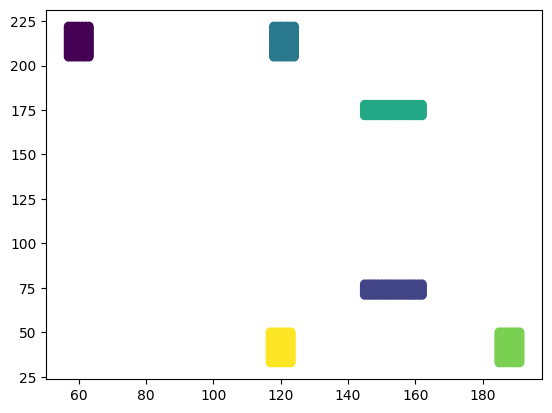

In [14]:
indices_split = np.where(f.tensor_labels == 1)
indices = np.argwhere(f.tensor_labels == 1)
# TODO make this so dont have to get init clusers
kmeans = KMeans(n_clusters=6)
y_pred = kmeans.fit_predict(indices)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(indices_split[0], indices_split[1], c=y_pred)

In [70]:
new_tensor_labels = f.tensor_labels.copy()

for x, y, door_label in zip(indices_split[0], indices_split[1], y_pred):
    new_tensor_labels[x,y] = 100+door_label # TODO make a higher number, like 100... based on number of expected rooms..

props = meas.regionprops(new_tensor_labels, f.tensor)

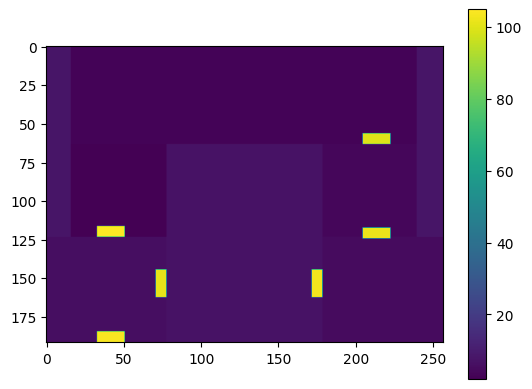

In [69]:
fig, ax = plt.subplots()
im = ax.imshow(new_tensor_labels)
cbar = ax.figure.colorbar(im, )
# harder to see when the door labels are very distinct from the other labels. this is jist a plotting issue that can be fixed with scaling later though 

In [67]:
props[12].label

15

In [90]:
def rgb_str_to_rgba(rgb_str):
    # Extract numeric values from the string using regular expression
    rgb_values = [int(value) for value in re.findall(r'\d+', rgb_str)]
    
    # Convert to RGBA format
    rgba_values = [value / 255 for value in rgb_values] + [1.0]  # Normalize RGB values to the range [0, 1]
    
    return tuple(rgba_values)

def print_keys_values(obj):
    if isinstance(obj, dict):
        # If it's a dictionary
        for key, value in obj.items():
            print(f"{key}: {value}")
    elif hasattr(obj, '__dict__'):
        # If it's an instance of a class
        for key, value in vars(obj).items():
            print(f"{key}: {value}")
    else:
        print("Unsupported object type")

def print_attribute_from_instances(instances, attribute_name):
    for instance in instances:
        # Use getattr to access the attribute dynamically
        attribute_value = getattr(instance, attribute_name, None)
        if attribute_value is not None:
            print(f"{attribute_name} for {instance.__class__.__name__}: {attribute_value}")
        else:
            print(f"{attribute_name} not found for {instance.__class__.__name__}")

def print_many_attributes_from_instances(instances, attribute_names):
    # print(f"\nAttributes for {instance.__class__.__name__}:")
    for ix, instance in enumerate(instances):
        for attribute_name in attribute_names:
            # Use getattr to access the attribute dynamically
            attribute_value = getattr(instance, attribute_name, None)
            if attribute_value is not None:
                print(f"{ix}: {attribute_name}: {attribute_value}")
            else:
                print(f"{ix}: {attribute_name} not found")

In [72]:
class newRegion():
    bbox:list = None
    coords:list = None
    shape:Polygon = None
    centroid:tuple = None
    unique_colors:set = None

0 {(255, 255, 0), (0, 0, 0)} 3720.0 2
1 {(0, 0, 0), (255, 0, 0)} 14336.0 3
2 {(255, 0, 127), (0, 0, 0)} 3660.0 4
3 {(255, 127, 0), (0, 0, 0)} 5304.0 5
4 {(0, 255, 0), (0, 0, 0)} 5304.0 6
5 {(0, 0, 0), (0, 0, 255)} 12928.0 7
6 {(0, 0, 0)} 31868.0 8
7 {(177, 177, 177)} 126.0 100
8 {(177, 177, 177)} 126.0 101
9 {(177, 177, 177)} 126.0 102
10 {(177, 177, 177)} 126.0 103
11 {(177, 177, 177)} 126.0 104
12 {(177, 177, 177)} 126.0 105


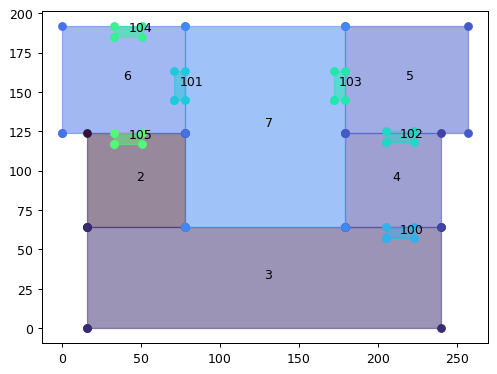

In [92]:
fig = plt.figure(  dpi=90)
ax = fig.add_subplot(111)  

n_colors = 30

colors = px.colors.sample_colorscale("turbo", [n/(n_colors -1) for n in range(n_colors)])
good_colors = [rgb_str_to_rgba(r) for r in colors]

regions = []
for ix, prop in enumerate(props):
    r = newRegion()

    int0 = prop.image_intensity
    s = int0.shape
    int01 = np.reshape(int0, (s[0] * s[1], 3))
    unique_tuples = {tuple(arr) for arr in int01}
    r.unique_colors = unique_tuples
    

    r.coords = create_coords(Bbox(prop.bbox))
    r.shape = Polygon(r.coords)
    r.centroid = (r.shape.centroid.x, r.shape.centroid.y)
    r.label = prop.label
    r.area = prop.bbox_area
    print(ix, unique_tuples, prop.bbox_area, prop.label)

    if r.unique_colors != {(0,0,0)}:
        regions.append(r)

    if ix != 6: 
        splt.plot_polygon(r.shape, ax=ax, alpha=0.5, color=good_colors[ix])
        ax.annotate(str(r.label), r.centroid)
    

In [98]:
# 100 touches 3, 4

print(regions[6].shape.touches(regions[1].shape))
print(regions[6].shape.touches(regions[2].shape))

False
True


In [99]:

print(regions[6].shape.intersects(regions[1].shape))
print(regions[6].shape.intersects(regions[2].shape))

True
True


In [102]:
print(regions[6].shape.relate(regions[1].shape))
print(regions[6].shape.relate(regions[2].shape))

2FF11F212
FF2F11212


In [100]:
print(regions[11].shape.intersects(regions[1].shape))
print(regions[11].shape.intersects(regions[2].shape))

False
False


In [103]:
print(regions[11].shape.relate(regions[1].shape))
print(regions[11].shape.relate(regions[2].shape))

FF2FF1212
FF2FF1212


In [97]:
# 102 touches 4, 5
print(regions[8].shape.touches(regions[2].shape))
print(regions[8].shape.touches(regions[3].shape))

False
False


In [101]:
print(regions[8].shape.intersects(regions[2].shape))
print(regions[8].shape.intersects(regions[3].shape))

True
True


In [91]:
print_many_attributes_from_instances(regions, ["label"])

0: label: 2
1: label: 3
2: label: 4
3: label: 5
4: label: 6
5: label: 7
6: label: 100
7: label: 101
8: label: 102
9: label: 103
10: label: 104
11: label: 105


In [ ]:
# see if can determine relationship between one shape and all others.. -> used a graph to do this .. but now want a bit different 
# only check adjacency for nodes with the label of door.. 
# but lets first explore relationships... 

In [83]:
print_attribute_from_instances(regions, "unique_colors")

unique_colors for newRegion: {(255, 255, 0), (0, 0, 0)}
unique_colors for newRegion: {(0, 0, 0), (255, 0, 0)}
unique_colors for newRegion: {(255, 0, 127), (0, 0, 0)}
unique_colors for newRegion: {(255, 127, 0), (0, 0, 0)}
unique_colors for newRegion: {(0, 255, 0), (0, 0, 0)}
unique_colors for newRegion: {(0, 0, 0), (0, 0, 255)}
unique_colors for newRegion: {(177, 177, 177)}
unique_colors for newRegion: {(177, 177, 177)}
unique_colors for newRegion: {(177, 177, 177)}
unique_colors for newRegion: {(177, 177, 177)}
unique_colors for newRegion: {(177, 177, 177)}
unique_colors for newRegion: {(177, 177, 177)}


In [81]:
print_keys_values(regions[6])

unique_colors: {(177, 177, 177)}
coords: [(205, 57), (223, 57), (223, 64), (205, 64)]
shape: POLYGON ((205 57, 223 57, 223 64, 205 64, 205 57))
centroid: (214.0, 60.5)
label: 100
area: 126.0


In [64]:
meas.regionprops?

Signature:
meas.regionprops(
    label_image,
    intensity_image=None,
    cache=True,
    *,
    extra_properties=None,
    spacing=None,
    offset=None,
)
Docstring:
Measure properties of labeled image regions.

Parameters
----------
label_image : (M, N[, P]) ndarray
    Labeled input image. Labels with value 0 are ignored.

    .. versionchanged:: 0.14.1
        Previously, ``label_image`` was processed by ``numpy.squeeze`` and
        so any number of singleton dimensions was allowed. This resulted in
        inconsistent handling of images with singleton dimensions. To
        recover the old behaviour, use
        ``regionprops(np.squeeze(label_image), ...)``.
intensity_image : (M, N[, P][, C]) ndarray, optional
    Intensity (i.e., input) image with same size as labeled image, plus
    optionally an extra dimension for multichannel data. Currently,
    this extra channel dimension, if present, must be the last axis.
    Default is None.

    .. versionchanged:: 0.18.0
        

# test 

In [18]:
len(f.regions)

AttributeError: 'FloorPlan2Graph' object has no attribute 'regions'

In [ ]:
# dont want to plot regions with label 8 or 1 with shapely 
all_region_props = meas.regionprops(f.tensor_labels, f.tensor)
all_region_props

In [ ]:
f.regions = f.regions[1:7]

In [ ]:
f.regions

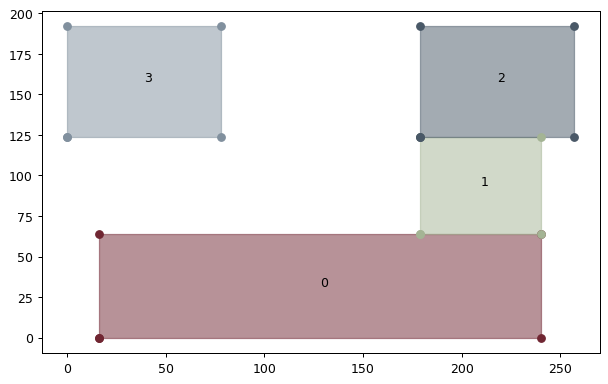

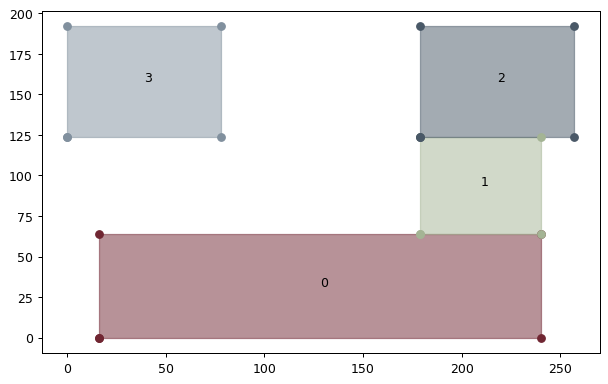

In [ ]:
f.view_plan_shapely()

In [ ]:
# based on image_intensity prop (has to update meas.region_props to recive unlabeled image), can see that 0 and 7 are the regions of interest. with 0 being the doors. although can search after the fact, can also consider dictionary, or including the values in 
all_region_props[7].image_intensity

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
all_region_props[0]?

Type:        RegionProperties
String form: <skimage.measure._regionprops.RegionProperties object at 0x122791a60>
File:        ~/_UILCode/gqe-phd/gqenv/lib/python3.9/site-packages/skimage/measure/_regionprops.py
Docstring:  
Please refer to `skimage.measure.regionprops` for more information
on the available region properties.


IndexError: list index out of range

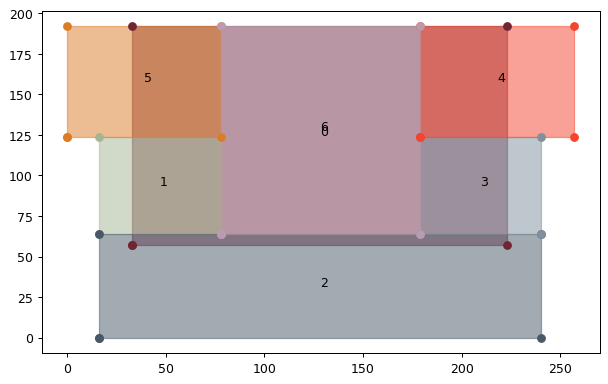

In [ ]:
f.array2shapely()
_ = f.view_plan_shapely()